# Clustering with Synthetic Data Using `make_blobs`
In this notebook, we explore unsupervised learning using K-Means clustering on synthetic data generated via `make_blobs`. We'll visualize ground truth clusters, apply K-Means, and evaluate clustering performance using silhouette score and inertia.

## Step 1: Generate Synthetic Data
Use `make_blobs` to generate a synthetic dataset with 300 samples, 2 features, and 3 centers.

In [12]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
features, labels_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(features, columns=['feature1', 'feature2'])
df['true_cluster'] = labels_true
df.head()

,feature1,feature2,true_cluster
0,-7.338988,-7.729954,2
1,-7.740041,-7.264665,2
2,-1.686653,7.793442,0
3,4.422198,3.071947,1
4,-8.917752,-7.888196,2


## Step 2: Visualize the True Clusters
Visualize the ground-truth clusters as generated by `make_blobs`.

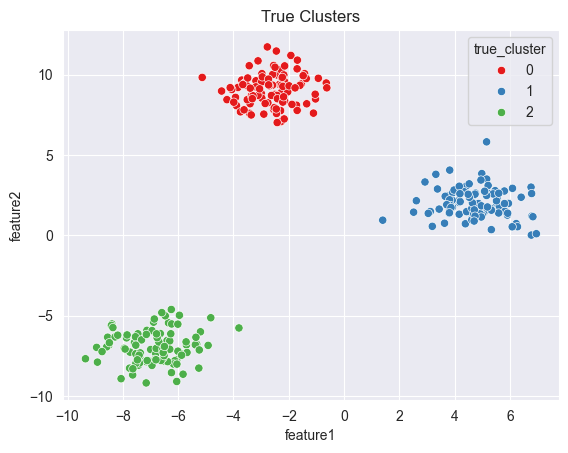

In [13]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='true_cluster', palette='Set1')
plt.title('True Clusters')
plt.grid(True)
plt.show()

## Step 3: Apply K-Means Clustering
Train a K-Means clustering model with k=3 clusters and assign predicted cluster labels.

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['feature1', 'feature2']])
df.head()

,feature1,feature2,true_cluster,kmeans_cluster
0,-7.338988,-7.729954,2,1
1,-7.740041,-7.264665,2,1
2,-1.686653,7.793442,0,0
3,4.422198,3.071947,1,2
4,-8.917752,-7.888196,2,1


## Step 4: Visualize K-Means Clusters
Compare the predicted clusters with the true clusters visually.

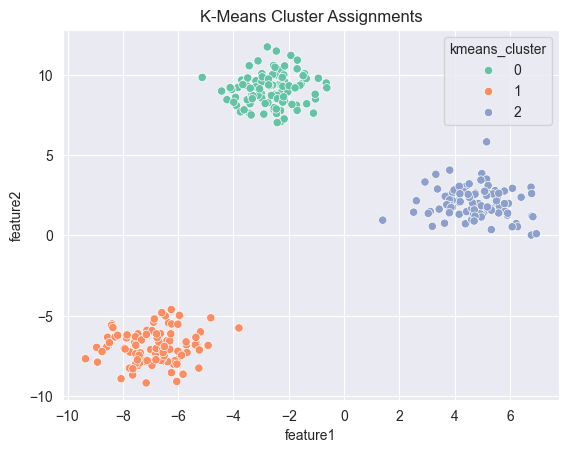

In [26]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='kmeans_cluster', palette='Set2')
plt.title('K-Means Cluster Assignments')
plt.grid(True)
plt.show()

## Step 5: Side-by-Side Comparison
Plot both the true clusters and predicted clusters side-by-side for comparison.

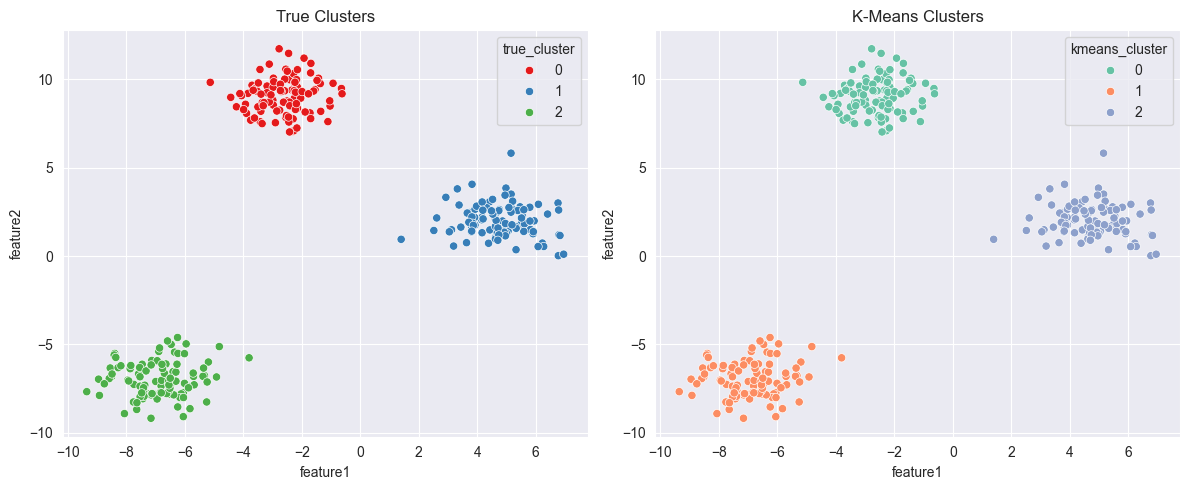

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], data=df, x='feature1', y='feature2', hue='true_cluster', palette='Set1')
axes[0].set_title('True Clusters')
sns.scatterplot(ax=axes[1], data=df, x='feature1', y='feature2', hue='kmeans_cluster', palette='Set2')
axes[1].set_title('K-Means Clusters')
plt.tight_layout()
plt.show()

## Step 6: Evaluate Clustering
Use silhouette score and inertia to evaluate clustering quality. Higher silhouette score indicates better separation. Lower inertia indicates tighter clusters.

In [28]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(df[['feature1', 'feature2']], df['kmeans_cluster'])
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Inertia: {inertia:.2f}")

Silhouette Score: 0.848
Inertia: 566.86
